In [1]:
import warnings
warnings.filterwarnings("ignore")


<img src="slide1.png" />

**Fashion-MNIST shares the same image size (28x28) and structure of training (60,000) and testing (10,000) splits.**

There are ten categories to classify in the fashion_mnist dataset:

Label Description:

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot

In [2]:
import pandas as pd

In [3]:
import keras

Using TensorFlow backend.


In [4]:
keras.backend.backend()

'tensorflow'

In [5]:
from keras.datasets import fashion_mnist

In [6]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_test.shape

(10000, 28, 28)

In [9]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [10]:
import matplotlib.pyplot as plt
plt.matshow(x_train[0])

In [11]:
y_train[0]

9

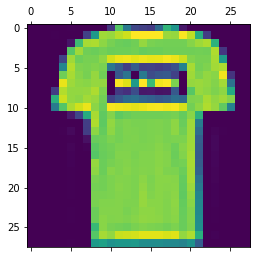

In [12]:
plt.matshow(x_train[1])

In [13]:
y_train[1]

0

<h3 style='color:purple'>Normalize training data before training the neural net</h3>

In [14]:
type(x_train[0])
## --> contain values from 0 to 255

numpy.ndarray

In [15]:
x_train=x_train/255
x_test=x_test/255

In [16]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

<img src='fashion_neural_net.png' />

<h3 style='color:purple'>Keras has this sequential model.
It is building a linear stack of neural network layers.</h3>

<h3 style='color:purple'>Now build the Sequential Model and add layers into it</h3>

In [17]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

<h3 style='color:purple'>Model</h3>

In [18]:
model=Sequential()

<h3 style='color:purple'>Input Layer</h3>

In [19]:
model.add(Flatten(input_shape=[28, 28]))

Flatten will convert the 28*28 2D array into 1D array

<h3 style='color:purple'>Hidden Layer</h3>

In [20]:
model.add(Dense(20,activation='relu')) 

The hidden ayer will be a dense layer.
Neurons taken=20(randomly).
The activation function of the neurons is relu.

<h3 style='color:purple'>Output Layer</h3>

In [21]:
model.add(Dense(10,activation='softmax'))

There are 10 neurons as there are total 10 types of classifier 

Softmax is often used as the activation for the last layer of a
classification network because the result could be interpreted as a probability distribution.
The softmax of each vector x is computed as exp(x) / tf.reduce_sum(exp(x))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [27]:
len(x_train)

60000

In [28]:
x_train.shape

(60000, 28, 28)

In [29]:
oops=Sequential([Dense(units=20,input_shape=(784,), activation='relu'),Dense(units=10, activation='softmax')])

In [30]:
oops.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                210       
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam",
              metrics=["accuracy"])

Loss function used for determining the diff b/w actual and predicted o/p

Optimizer is the alogrithm that helps you adjust the weight of edges as you are doing the training

In [32]:
model.fit(x_train, y_train,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 88us/step - loss: 0.5749 - accuracy: 0.8013
Epoch 2/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.4298 - accuracy: 0.8497
Epoch 3/5
60000/60000 [==============================] - 4s 60us/step - loss: 0.3991 - accuracy: 0.8597
Epoch 4/5
60000/60000 [==============================] - 4s 60us/step - loss: 0.3830 - accuracy: 0.8646
Epoch 5/5
60000/60000 [==============================] - 4s 60us/step - loss: 0.3687 - accuracy: 0.8692


------

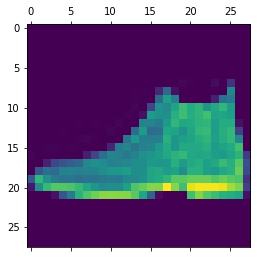

In [33]:
plt.matshow(x_test[0])

In [34]:
x_test.shape # there are 1000 images of 28*28 pixels

(10000, 28, 28)

In [35]:
yy=model.predict(x_test)

In [36]:
yy[0]

array([2.19483518e-05, 5.21490806e-09, 3.91652611e-06, 6.35143806e-07,
       1.72139262e-05, 3.50894868e-01, 7.26757789e-05, 1.18323356e-01,
       4.79854876e-03, 5.25866807e-01], dtype=float32)

gives probabilities of firing of neurons of the o/p layers

In [37]:
import numpy as np

In [38]:
np.argmax(yy[0])

9

value at index 9 has the greatest value

In [39]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [40]:
class_labels[np.argmax(yy[0])]

'Ankle boot'

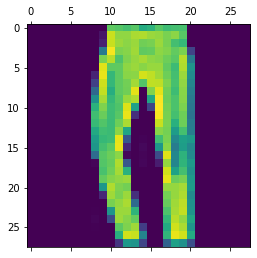

In [41]:
plt.matshow(x_test[5])

In [42]:
yy[5]

array([2.5479270e-03, 9.9665713e-01, 9.7268596e-05, 2.8713894e-04,
       3.6305084e-04, 6.9112289e-09, 4.6157151e-05, 1.3883906e-07,
       1.1784405e-06, 6.9420580e-11], dtype=float32)

In [43]:
np.argmax(yy[5])

1

In [44]:
class_labels[np.argmax(yy[5])]

'Trouser'

let's find the accuracy

In [45]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 33us/step


[0.4456072845697403, 0.845300018787384]

the 2nd part is accuracy and the 1st is loss